In [ ]:
%load_ext autoreload
%autoreload 2

import os
os.environ["HF_HOME"] = "../tmp_saves/hg_cache"

import re
import nltk
import csv
import matplotlib.pyplot as plt
from tqdm import tqdm
from datasets import load_dataset

In [7]:
def show_word_lens_hist(word_lens):
    plt.hist(word_lens, bins=100, cumulative=True, histtype="step", density=True)
    plt.title("Word length histogram")
    plt.xlabel("Word length")
    plt.ylabel("Cumulative probability")
    plt.show()

## IMDB

In [2]:
dataset = load_dataset("imdb")
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
})

In [3]:
CLEANR = re.compile('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')

def cleanhtml(raw_html):
    return re.sub(CLEANR, '', raw_html)

In [4]:
dataset["unsupervised"][0]

{'text': 'This is just a precious little diamond. The play, the script are excellent. I cant compare this movie with anything else, maybe except the movie "Leon" wonderfully played by Jean Reno and Natalie Portman. But... What can I say about this one? This is the best movie Anne Parillaud has ever played in (See please "Frankie Starlight", she\'s speaking English there) to see what I mean. The story of young punk girl Nikita, taken into the depraved world of the secret government forces has been exceptionally over used by Americans. Never mind the "Point of no return" and especially the "La femme Nikita" TV series. They cannot compare the original believe me! Trash these videos. Buy this one, do not rent it, BUY it. BTW beware of the subtitles of the LA company which "translate" the US release. What a disgrace! If you cant understand French, get a dubbed version. But you\'ll regret later :)',
 'label': -1}

100%|██████████| 50000/50000 [01:00<00:00, 832.99it/s]


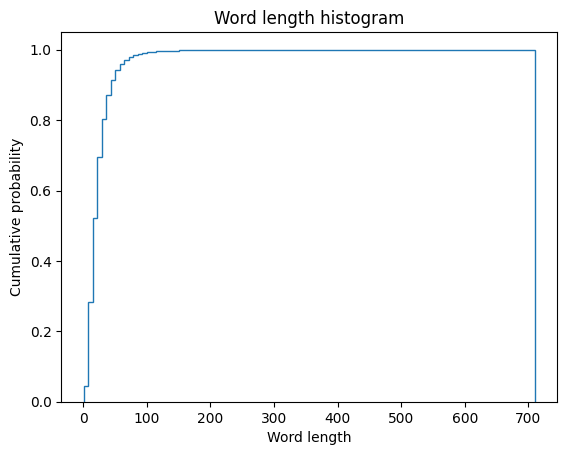

In [8]:
n_sents = 0
SENT_LEN_THRES = 32
SENT_LEN_MIN_THRES = 16
all_word_lens = list()
with open("imdb.csv", "w") as fp:
    writer = csv.DictWriter(fp, fieldnames=["sentence_id", "plaintext"])
    writer.writeheader()
    for example in tqdm(dataset["unsupervised"]):
        text = example["text"]
        text = cleanhtml(text)
        sents = nltk.sent_tokenize(text)
        sents_buf = ""
        for sent_idx, sent in enumerate(sents):
            sents_buf += sent + " "
            sents_buf = sents_buf.strip()
            if len(sents_buf) >= SENT_LEN_THRES:
                writer.writerow({"sentence_id": n_sents, "plaintext": sents_buf})
                all_word_lens.append(len(nltk.word_tokenize(sents_buf)))
                sents_buf = ""
                n_sents += 1
        if len(sents_buf) >= SENT_LEN_MIN_THRES:
            writer.writerow({"sentence_id": n_sents, "plaintext": sents_buf})
            all_word_lens.append(len(nltk.word_tokenize(sents_buf)))
            n_sents += 1

show_word_lens_hist(all_word_lens)